# Load Dataset and Library

In [2]:
import pandas as pd

In [2]:
df_studass = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/studentAssessment.csv')
df_studin = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/studentInfo.csv')
df_studvle = pd.read_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/Dataset/studentVle.csv')

# Penggabungan Data

In [3]:
df = pd.merge(df_studass, df_studin, on='id_student', how='outer')
df = pd.merge(df, df_studvle, on='id_student', how='outer')


In [5]:
df.shape

(132276475, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132276475 entries, 0 to 132276474
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_assessment         float64
 1   id_student            int64  
 2   date_submitted        float64
 3   is_banked             float64
 4   score                 float64
 5   code_module_x         object 
 6   code_presentation_x   object 
 7   gender                object 
 8   region                object 
 9   highest_education     object 
 10  imd_band              object 
 11  age_band              object 
 12  num_of_prev_attempts  int64  
 13  studied_credits       int64  
 14  disability            object 
 15  final_result          object 
 16  code_module_y         object 
 17  code_presentation_y   object 
 18  id_site               float64
 19  date                  float64
 20  sum_click             float64
dtypes: float64(7), int64(3), object(11)
memory usage: 20.7+ GB


In [6]:
df.drop(columns=['code_module_y', 'code_presentation_y'], inplace=True)

In [7]:
df.rename(columns={"code_module_x": "code_module", "code_presentation_x": "code_presentation"}, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132276475 entries, 0 to 132276474
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_assessment         float64
 1   id_student            int64  
 2   date_submitted        float64
 3   is_banked             float64
 4   score                 float64
 5   code_module           object 
 6   code_presentation     object 
 7   gender                object 
 8   region                object 
 9   highest_education     object 
 10  imd_band              object 
 11  age_band              object 
 12  num_of_prev_attempts  int64  
 13  studied_credits       int64  
 14  disability            object 
 15  final_result          object 
 16  id_site               float64
 17  date                  float64
 18  sum_click             float64
dtypes: float64(7), int64(3), object(9)
memory usage: 18.7+ GB


# EDA

In [11]:
df['code_module'].value_counts()

code_module
FFF    51336324
CCC    28199737
DDD    24537715
BBB    14201986
EEE     8663484
GGG     3409807
AAA     1927422
Name: count, dtype: int64

In [12]:
df['final_result'].value_counts()

final_result
Pass           77611124
Distinction    28041766
Withdrawn      13345607
Fail           13277978
Name: count, dtype: int64

In [13]:
df.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_site,date,sum_click
0,1752.0,11391,18.0,0.0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546669.0,-5.0,16.0
1,1752.0,11391,18.0,0.0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546662.0,-5.0,44.0
2,1752.0,11391,18.0,0.0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652.0,-5.0,1.0
3,1752.0,11391,18.0,0.0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546668.0,-5.0,2.0
4,1752.0,11391,18.0,0.0,78.0,AAA,2013J,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,546652.0,-5.0,1.0


In [14]:
result_counts = df.groupby(['code_module', 'final_result']).size().unstack().fillna(0)
result_counts

final_result,Distinction,Fail,Pass,Withdrawn
code_module,,,,
AAA,219702,99863,1410285,197572
BBB,2710052,1596718,8952502,942714
CCC,6739046,2928599,12618379,5913713
DDD,3836697,3071203,15015304,2614511
EEE,2501319,429148,5329251,403766
FFF,11095644,4878458,32128161,3234061
GGG,939306,273989,2157242,39270


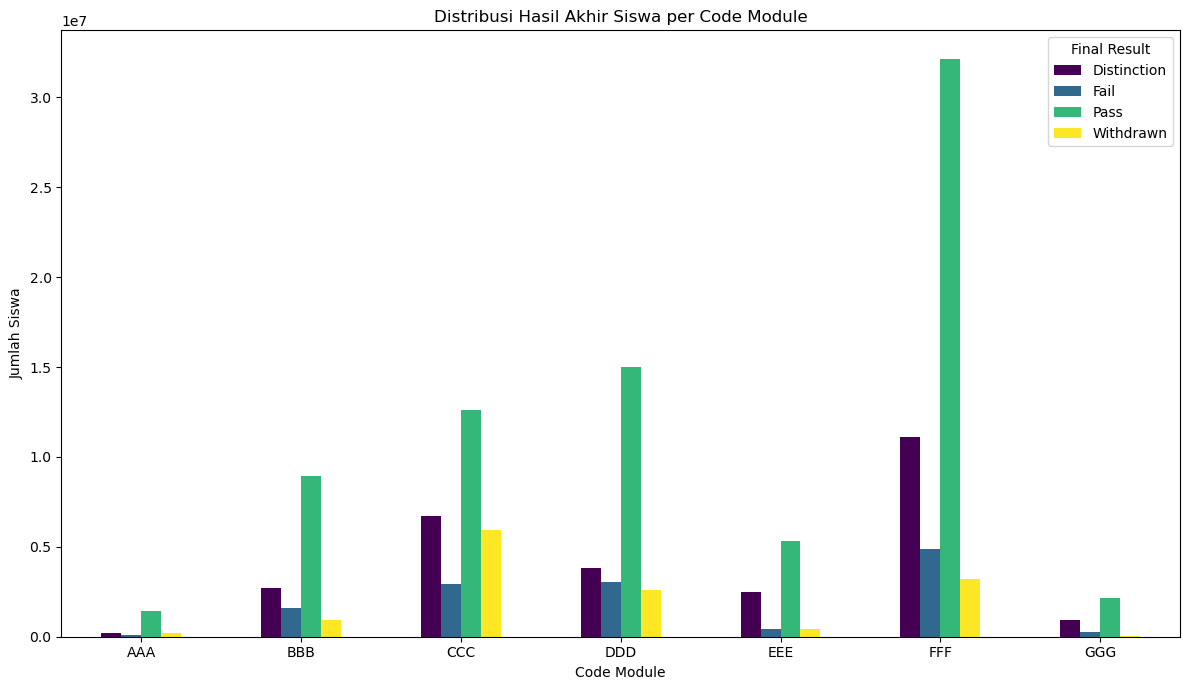

In [16]:
import matplotlib.pyplot as plt

# Visualisasi dengan Grouped Bar Chart
result_counts.plot(kind='bar', figsize=(12, 7), colormap="viridis")
plt.title('Distribusi Hasil Akhir Siswa per Code Module')
plt.xlabel('Code Module')
plt.ylabel('Jumlah Siswa')
plt.legend(title='Final Result')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Filter code_module = 'BBB'

In [17]:
df = df[df['code_module'] == 'BBB']

In [22]:
df.isnull().sum()

id_assessment            12535
id_student                   0
date_submitted           12535
is_banked                12535
score                    25328
code_module                  0
code_presentation            0
gender                       0
region                       0
highest_education            0
imd_band                195017
age_band                     0
num_of_prev_attempts         0
studied_credits              0
disability                   0
final_result                 0
id_site                   1247
date                      1247
sum_click                 1247
dtype: int64

# Preprocessing

In [24]:
df.duplicated().sum()

1464721

In [25]:
df.drop_duplicates()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_site,date,sum_click
1999761,14984.0,1008675,19.0,0.0,70.0,BBB,2013B,F,East Anglian Region,Lower Than A Level,90-100%,35-55,0,60,N,Pass,542808.0,-5.0,1.0
1999762,14984.0,1008675,19.0,0.0,70.0,BBB,2013B,F,East Anglian Region,Lower Than A Level,90-100%,35-55,0,60,N,Pass,542864.0,-5.0,1.0
1999763,14984.0,1008675,19.0,0.0,70.0,BBB,2013B,F,East Anglian Region,Lower Than A Level,90-100%,35-55,0,60,N,Pass,542808.0,-5.0,7.0
1999764,14984.0,1008675,19.0,0.0,70.0,BBB,2013B,F,East Anglian Region,Lower Than A Level,90-100%,35-55,0,60,N,Pass,542808.0,-5.0,3.0
1999766,14984.0,1008675,19.0,0.0,70.0,BBB,2013B,F,East Anglian Region,Lower Than A Level,90-100%,35-55,0,60,N,Pass,543076.0,-5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132181708,NaN,2687739,NaN,NaN,NaN,BBB,2014J,F,West Midlands Region,A Level or Equivalent,20-30%,35-55,0,120,N,Withdrawn,913528.0,6.0,2.0
132181710,NaN,2687739,NaN,NaN,NaN,BBB,2014J,F,West Midlands Region,A Level or Equivalent,20-30%,35-55,0,120,N,Withdrawn,913528.0,6.0,1.0
132181711,NaN,2687739,NaN,NaN,NaN,BBB,2014J,F,West Midlands Region,A Level or Equivalent,20-30%,35-55,0,120,N,Withdrawn,913535.0,6.0,1.0
132181712,NaN,2687739,NaN,NaN,NaN,BBB,2014J,F,West Midlands Region,A Level or Equivalent,20-30%,35-55,0,120,N,Withdrawn,913494.0,6.0,7.0


In [26]:
columns_to_remove = ['id_assessment', 'id_student', 'id_site', 'imd_band','is_banked','code_presentation']
df = df.drop(columns=columns_to_remove)

In [27]:
df.isnull().sum()

date_submitted          12535
score                   25328
code_module                 0
gender                      0
region                      0
highest_education           0
age_band                    0
num_of_prev_attempts        0
studied_credits             0
disability                  0
final_result                0
date                     1247
sum_click                1247
dtype: int64

In [28]:
df.shape

(14201986, 13)

In [29]:
df = df.dropna(subset=['date_submitted', 'score', 'date', 'sum_click'])

# Simpan data dalam csv

In [31]:
df.to_csv('D:/_KULIAH/SEMESTER 7/Analisis Big Data/UTS/mergedata2.csv', index=False)

In [3]:
df = pd.read_csv('mergedata2.csv')

In [4]:
df.head()

,date_submitted,score,code_module,gender,region,highest_education,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date,sum_click
0,19.0,70.0,BBB,F,East Anglian Region,Lower Than A Level,35-55,0,60,N,Pass,-5.0,1.0
1,19.0,70.0,BBB,F,East Anglian Region,Lower Than A Level,35-55,0,60,N,Pass,-5.0,1.0
2,19.0,70.0,BBB,F,East Anglian Region,Lower Than A Level,35-55,0,60,N,Pass,-5.0,7.0
3,19.0,70.0,BBB,F,East Anglian Region,Lower Than A Level,35-55,0,60,N,Pass,-5.0,3.0
4,19.0,70.0,BBB,F,East Anglian Region,Lower Than A Level,35-55,0,60,N,Pass,-5.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14176608 entries, 0 to 14176607
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date_submitted        float64
 1   score                 float64
 2   code_module           object 
 3   gender                object 
 4   region                object 
 5   highest_education     object 
 6   age_band              object 
 7   num_of_prev_attempts  int64  
 8   studied_credits       int64  
 9   disability            object 
 10  final_result          object 
 11  date                  float64
 12  sum_click             float64
dtypes: float64(4), int64(2), object(7)
memory usage: 1.4+ GB
